In [1]:
from collections import Counter
from sklearn.datasets import make_classification

In [2]:
x,y=make_classification(n_samples=10000,n_features=2, n_clusters_per_class=1, n_redundant=0, weights=[0.99], random_state=10)

In [3]:
x

array([[ 1.87991016, -1.4850347 ],
       [ 0.37708311, -2.23858488],
       [ 1.35431163, -2.66463822],
       ...,
       [ 0.99509904, -0.54192355],
       [ 1.75859359, -1.54961188],
       [ 0.79770543, -1.99467372]])

In [6]:
Counter(y)

Counter({np.int64(0): 9846, np.int64(1): 154})

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
df = pd.DataFrame(x, columns=['Feature 1', 'Feature 2'])
df['Target'] = y

<Axes: xlabel='Feature 1', ylabel='Feature 2'>

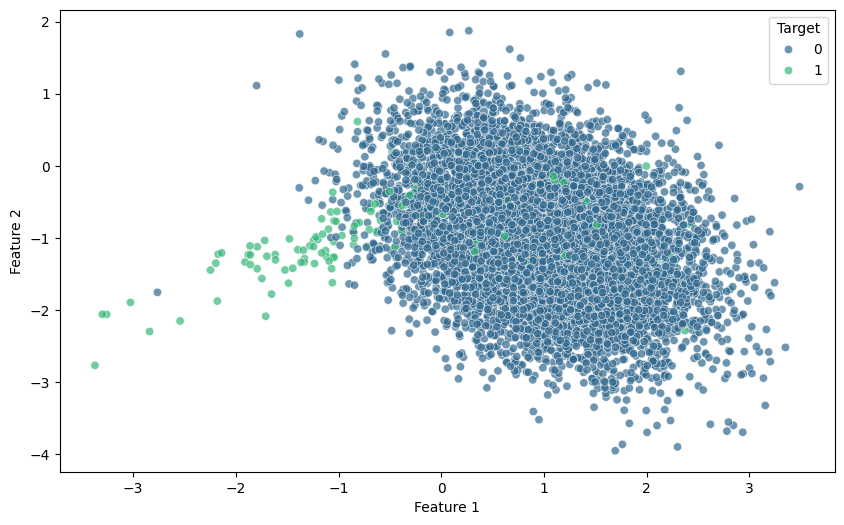

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Feature 1', y='Feature 2', hue='Target', data=df, palette='viridis', alpha=0.7)


In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [20]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()
penalty=['l1','l2','elasticnet']
c_values=[100,10,1.0,0.1,0.01]
solver=['newton-cg','lbfgs','liblinear','sag','saga']
class_weight=[{0:w, 1:y} for w in [1,10,50,100] for y in [1,10,50,100]] 

In [21]:
params=dict(penalty=penalty, C=c_values,solver=solver, class_weight=class_weight )

In [22]:
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1.0, 0.1, 0.01],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 100}]}

In [24]:
### gridsearchcv(find the best parameter fit for the dataset)

from sklearn.model_selection import GridSearchCV, StratifiedKFold
cv=StratifiedKFold()
grid=GridSearchCV(estimator=logistic, param_grid=params, scoring='accuracy', cv=cv, n_jobs=-1)

In [25]:
grid.fit(x_train,y_train)

/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/myenv/lib/python3.10/site-pack

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [26]:
y_pred=grid.predict(x_test)

In [27]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [28]:
 grid.best_params_

{'C': 0.01,
 'class_weight': {0: 10, 1: 50},
 'penalty': 'l2',
 'solver': 'newton-cg'}

In [29]:
grid.best_score_

np.float64(0.9881333333333334)

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [32]:
score=accuracy_score(y_test,y_pred)
matrix=confusion_matrix(y_test,y_pred)
classification=classification_report(y_test,y_pred)
print(score)
print(matrix)
print(classification)

0.992
[[2468    2]
 [  18   12]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2470
           1       0.86      0.40      0.55        30

    accuracy                           0.99      2500
   macro avg       0.92      0.70      0.77      2500
weighted avg       0.99      0.99      0.99      2500

